## Price prediction model
Loading libraries

In [211]:
try:
    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt
    from sklearn.linear_model import LinearRegression
    from sklearn.metrics import r2_score
    import pandas_datareader as pdr
    import datetime
    plt.style.use('fivethirtyeight')
    print("Everything loaded!!!")
except:
    print("Opps, something went wrong!!!")

Everything loaded!!!


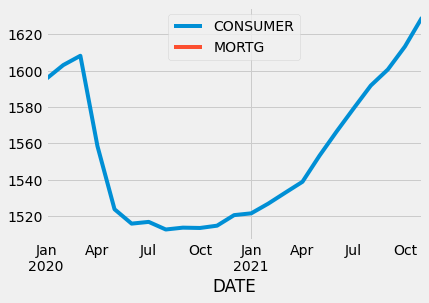

In [212]:
import pandas_datareader as pdr
import datetime

start = datetime.date(2020, 1, 1)
end = datetime.date(2021, 12, 1)

df = pdr.data.get_data_fred(["CONSUMER","MORTG"], start, end)
pd.DataFrame(df)
df.plot()
plt.show()

In [213]:
import pandas_datareader as pdr
from datetime import datetime
df = pdr.get_data_yahoo('^GSPC', start='2021-05-03', end='2021-12-26')
df =pd.DataFrame(df)

In [214]:
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-05-03,4209.390137,4188.029785,4191.979980,4192.660156,4061170000,4192.660156
2021-05-04,4179.040039,4128.589844,4179.040039,4164.660156,4441080000,4164.660156
2021-05-05,4187.720215,4160.939941,4177.060059,4167.589844,4029050000,4167.589844
2021-05-06,4202.700195,4147.330078,4169.140137,4201.620117,4504860000,4201.620117
2021-05-07,4238.040039,4201.640137,4210.339844,4232.600098,4013060000,4232.600098
...,...,...,...,...,...,...
2021-12-17,4666.700195,4600.220215,4652.500000,4620.640137,5609780000,4620.640137
2021-12-20,4587.899902,4531.100098,4587.899902,4568.020020,3395780000,4568.020020
2021-12-21,4651.140137,4583.160156,4594.959961,4649.229980,2564370000,4649.229980


In [215]:
df3 = df.copy()

In [216]:
df3['Numbers'] = list(range(0,len(df3)))
x = np.array(df3[['Numbers']])

In [217]:
#store price as an array as well
y = df3['Close'].values

In [218]:
lin_model = LinearRegression().fit(x,y)

In [219]:
lin_model.intercept_
lin_model.coef_

array([3.25874391])

In [220]:
print(f"""the intercept is: {lin_model.intercept_},
the Slope is: {lin_model.coef_}""")

the intercept is: 4158.266930470461,
the Slope is: [3.25874391]


In [221]:
#Data wrangling   y = mx+b
y_predict = lin_model.coef_ * x + lin_model.intercept_
df3['pred'] = y_predict


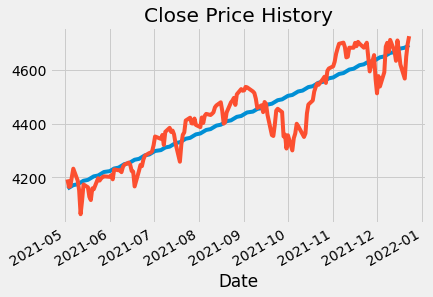

In [222]:
df3["pred"].plot()
df3["Close"].plot()
plt.title("Close Price History")
plt.show()

In [223]:
print(f"The model is {np.ceil((r2_score(df3['Close'],df3['pred']))*100)}% effective.")

The model is 84.0% effective.


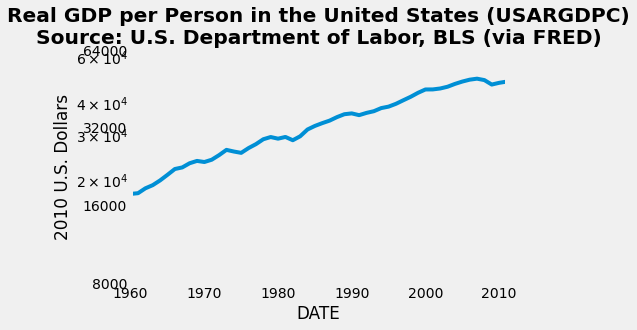

In [224]:
import pandas as pd
import matplotlib.pyplot as plt


##### download data from FRED #####

# Real GDP per capita (2010 Dollars, annual, NSA)
USARGDPC = pdr.get_data_fred('USARGDPC', start='1960-01-01')

##### plot the data #####

# basic plot in one line of code!
ax = USARGDPC.plot(legend=False)

# add labels, axes, title, etc
ax.set_ylabel("2010 U.S. Dollars")
ax.set_yscale('log')
ax.set_ylim(8000, 64000)
ax.set_yticks([8000, 16000, 32000, 64000])
ax.set_yticklabels([8000, 16000, 32000, 64000])
ax.set_title("Real GDP per Person in the United States (USARGDPC)\nSource: U.S. Department of Labor, BLS (via FRED)", weight='bold')
ax.grid()


